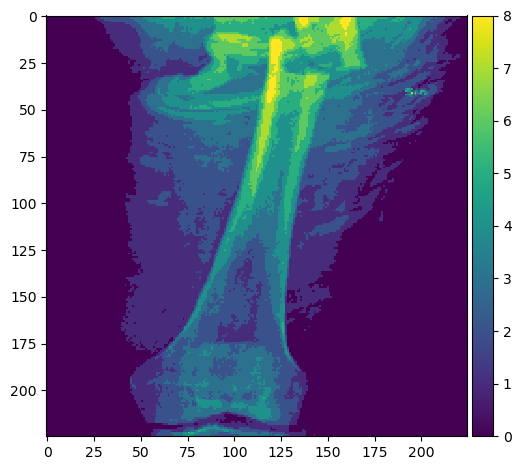

In [114]:
import skimage
import cv2
import matplotlib
from skimage import io
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
io.use_plugin('matplotlib')


#conda install cv2
#pip install opencv-python




from PIL import Image
from skimage.transform import rescale, resize, downscale_local_mean
import os



# PUT IN LOOP
img = cv2.imread("/local/data1/chash345/AFF_large/patient_1206_AFF_class_1_modality_CR_scanoccasion_0_imagenumber_2.png", cv2.COLOR_RGB2BGR)



width = 225
height = 225
dim = (width, height)



# resize image
resized = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)
io.imshow(resized)
io.show()

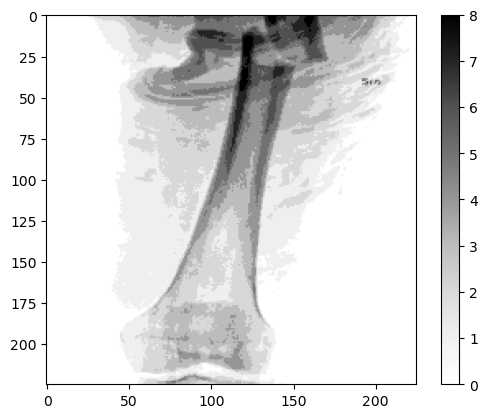

In [124]:
plt.imshow(resized, cmap='Greys')
plt.colorbar()

In [116]:
resized.shape

(225, 225)

In [117]:
resized.mean()

1.4753185185185185

In [118]:
np.amin(resized)

0

In [119]:
np.amax(resized)

8

In [120]:
resized.size

50625

/tmp/ipykernel_30954/2047604118.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(resized.ravel(),


Text(0, 0.5, '# Pixels in Image')

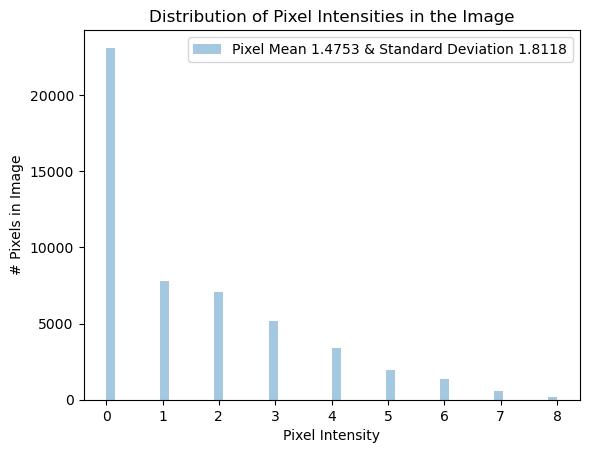

In [125]:
sns.distplot(resized.ravel(),
             label=f"Pixel Mean {np.mean(resized):.4f} & Standard Deviation {np.std(resized):.4f}", kde=False)
plt.legend(loc='upper right')
plt.title('Distribution of Pixel Intensities in the Image')
plt.xlabel('Pixel Intensity')
plt.ylabel('# Pixels in Image')

/home/chash345/.conda/envs/research/lib/python3.9/site-packages/skimage/io/_plugins/matplotlib_plugin.py:150: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


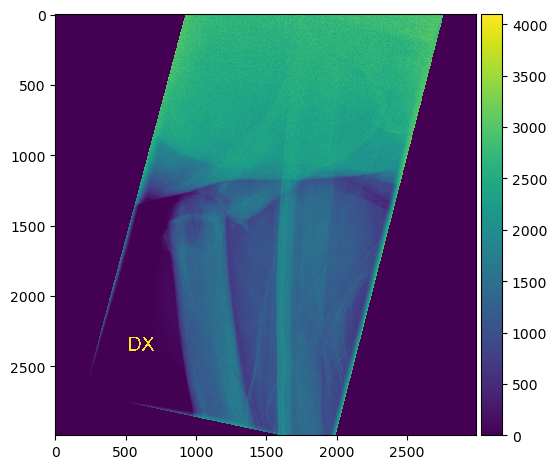

In [74]:
img = cv2.imread("../AFF_large/patient_1215_AFF_class_1_modality_CR_scanoccasion_0_imagenumber_2.png", cv2.IMREAD_UNCHANGED)
io.imshow(img)
io.show()

/home/chash345/.conda/envs/research/lib/python3.10/site-packages/skimage/io/_plugins/matplotlib_plugin.py:150: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


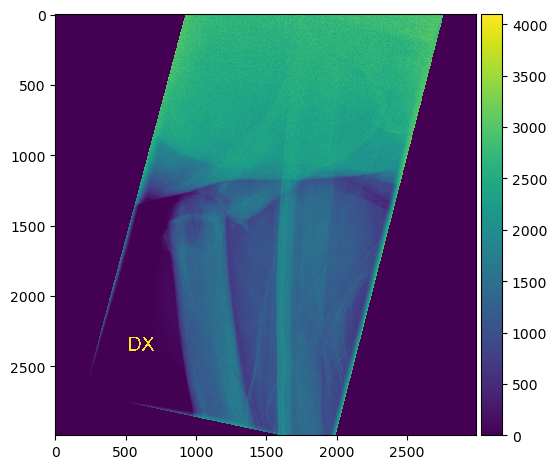

In [45]:
img = cv2.imread("../AFF_large/patient_1215_AFF_class_1_modality_CR_scanoccasion_0_imagenumber_2.png", cv2.IMREAD_UNCHANGED)
io.imshow(img)
io.show()

In [120]:
img = cv2.imread("../AFF_large/patient_78_AFF_class_1_modality_CR_scanoccasion_0_imagenumber_1.png")

#get size
height, width, c= img.shape
height

2688

In [121]:
width

1728

In [122]:
c

3

In [20]:
# Create a black image
x = height if height > width else width
y = height if height > width else width
squared_image= np.zeros((x,y), np.uint64)

squared_image[int((y-height)/2):int(y-(y-height)/2), int((x-width)/2):int(x-(x-width)/2)] = img

io.imshow(squared_image)
io.show()
squared_image.shape

ValueError: could not broadcast input array from shape (2140,1760) into shape (500,500)

In [124]:
cv2.imwrite('resized.png', squared_image)

True

/home/chash345/.conda/envs/research/lib/python3.10/site-packages/skimage/io/_plugins/matplotlib_plugin.py:150: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


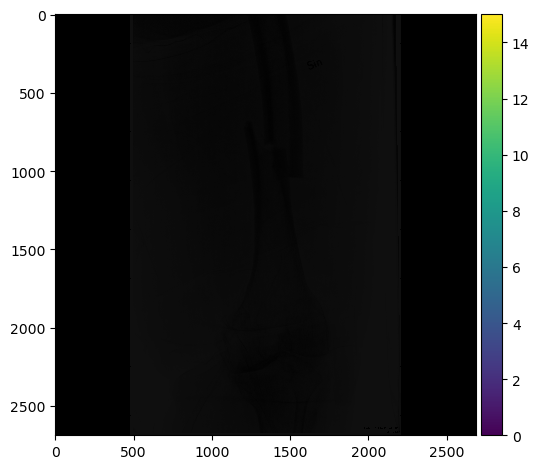

(2688, 2688, 3)

In [127]:
resizedd = cv2.imread("resized.png", cv2.IMREAD_UNCHANGED)
io.imshow(resizedd)
io.show()
resizedd.shape

In [9]:
image_names = os.listdir('../AFF_large')

In [36]:
import cv2
import numpy as np
from os import listdir
from os.path import isfile, join
from pathlib import Path
import argparse
import numpy

# Argument parsing variable declared
#ap = argparse.ArgumentParser()

#ap.add_argument("-i", "--image",
#                required=True,
#                help="Path to folder")

#args = vars(ap.parse_args())

# Find all the images in the provided images folder
mypath = "images/AFF_large"
onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))]
images = numpy.empty(len(onlyfiles), dtype=object)
print("Total number of images: ", len(onlyfiles))

# Iterate through every image
# and resize all the images.



for n in range(0, (len(onlyfiles)+1)):

    path = join(mypath, onlyfiles[n])
    images[n] = cv2.imread(join(mypath, onlyfiles[n]),
                           cv2.IMREAD_UNCHANGED)

    # Load the image in img variable
    img = cv2.imread(path, 1)

  


   #get size
    height, width, channels = img.shape



   # Create a black image
    x = height if height > width else width
    y = height if height > width else width
    squared_image= np.zeros((x,y,3), np.uint8)
  
    squared_image[int((y-height)/2):int(y-(y-height)/2), int((x-width)/2):int(x-(x-width)/2)] = img



   # Save the image in Resize Folder
    cv2.imwrite(
      'resize/' + onlyfiles[n][0:-4] + '_resized.jpg', squared_image)
    
    if(n%500 == 0): print(f'{n} images resized successfully')



Total number of images:  4335
0 images resized successfully
500 images resized successfully
1000 images resized successfully
1500 images resized successfully
2000 images resized successfully
2500 images resized successfully
3000 images resized successfully
3500 images resized successfully


In [10]:
class_dict ={'control':[], 'aff':[]}
for i in image_names:
    if 'CONTROL' in i.split('_'):
        class_dict['control'].append(i)
    else:
        class_dict['aff'].append(i)
    continue

In [11]:
len(class_dict['aff'])

868

In [12]:
len(class_dict['control'])

3467

In [14]:
class_dict['control'].sort()


In [15]:
class_dict['aff'].sort()


In [27]:
train_control_indexlist = class_dict['control'][:(int(len(class_dict['control']) * .6))]

In [69]:
train_aff_indexlist = class_dict['aff'][:(int(len(class_dict['aff']) * .6))]

In [70]:
len(train_aff_indexlist)

520

In [44]:
len(train_control_indexlist)

2080

In [38]:
valid_control_indexlist = class_dict['control'][len(train_control_indexlist):2775]

In [71]:
valid_aff_indexlist = class_dict['aff'][len(train_aff_indexlist):695]

In [72]:
len(valid_aff_indexlist)

175

In [41]:
len(valid_control_indexlist)

695

In [42]:
test_control_indexlist =  class_dict['control'][2776:]

In [73]:
test_aff_indexlist =  class_dict['aff'][695:]

In [74]:
len(test_aff_indexlist)

173

In [43]:
len(test_control_indexlist)

691

In [53]:
def filter_list(string, substr): 
    return [st for st in string if any(sub in st for sub in substr)]

In [87]:
valid_control_filtered_list= filter_list(image_names, valid_control_indexlist)

In [88]:
valid_aff_filtered_list= filter_list(image_names, valid_aff_indexlist)

In [89]:
test_control_filtered_list= filter_list(image_names, test_control_indexlist)

In [90]:
test_aff_filtered_list= filter_list(image_names, test_aff_indexlist)

In [95]:
len(valid_aff_filtered_list)

175

In [101]:
import shutil
old_path = '../images/AFF_large/'
new_path = '../test/aff/'

In [102]:
for filename in os.listdir(old_path):
    if filename in test_aff_filtered_list:
        old_loc = rf"{old_path}/{filename}"
        new_loc = rf"{new_path}/{filename}"
        shutil.copy(old_loc, new_loc)

In [104]:
len(os.listdir('../test/aff/'))

173

In [4]:
from tqdm import tqdm

In [5]:
def load_data(dir_path, img_size=(100,100)):
    """
    Load resized images as np.arrays to workspace
    """
    X = []
    y = []
    i = 0
    labels = dict()
    for path in tqdm(sorted(os.listdir(dir_path))):
        if not path.startswith('.'):
            labels[i] = path
            for file in os.listdir(dir_path + path):
                if not file.startswith('.'):
                    img = cv2.imread(dir_path + path + '/' + file)
                    X.append(img)
                    y.append(i)
            i += 1
    X = np.array(X)
    y = np.array(y)
    print(f'{len(X)} images loaded from {dir_path} directory.')
    return X, y, labels